# Project Sprint 13 : "Sweet Lift" Taxi Order Quantity Prediction.

## Introduction

A taxi company called Sweet Lift has collected historical data on taxi orders at the airport. In order to attract more drivers at peak hours, it needs to predict the number of taxi orders for the next hour.

### Goal

This project aims to create a predictive model capable of predicting the number of taxi orders using RMSE as an evaluation metric, where the metric requirement on the `test set` data is no more than 48.

### Steps

Historical data about taxi orders at the airport is stored in the filepath `/datasets/taxi.csv`, where the number of orders is contained in the `num_orders` column. Model development is done in the following steps:
1. Downloading data and *resampling* within one hour.
2. Analyzing the dataset.
3. Train several different models with different hyperparameters. The test sample should be 10% of the initial *dataset*.
4. Test the data using the test samples and provide conclusions.

### Overview

**1. Introduction**
- Objective
- Stages
- Overview

**2. Data Preparation**
- Initialization
- Load Dataset
- Data Preparation
- Data Cleansing and Pre-Processing

**3. Analysis**
- Moving Average
- Trend and Seasonality
- Stationarity

**4. Training**
- Feature Preparation
- Train and Test Set Preparation
- Modeling

**5. Testing**

**6. Conclusion**

## Data Preparation

### Initialization

In order to perform data analysis and pre-processing, libraries that can help with these activities are first loaded, namely:
1. `Pandas` Library
2. `Seaborn` Library
3. `MatPlotLibt` Library
4. `NumPy` Library

In [3]:
# Memuat library pandas
import pandas as pd

# Memuat seaborn library
import seaborn as sns

# Memuat matplotlib library
from matplotlib import pyplot as plt

# Memuat numpy library
import numpy as np

# Mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

print('Library berhasil di import')

Library berhasil di import


### Loading Data

Historical data about taxi orders at the airport is stored in the filepath: `/datasets/taxi.csv`.

In [2]:
# memuat data set dan menyimpannya dalam variabel taxi
taxi = pd.read_csv('/datasets/taxi.csv')

### Data Preparation

We will look at the sample data, general information and descriptive statistics of the data.

In [3]:
# melihat sampel data
taxi.head(10)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


In [4]:
# melihat statistika deskriptif data
taxi.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [5]:
# menampilkan informasi umum dataset
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


***
**Findings**

Based on the data sample, descriptive statistics, and general data information, the following information was obtained:
1. The obtained dataset consists of 2 columns and 26496 observations, where the data type of column `datetime` is `object` and the data type of column `num_orders` is `integer`, therefore, the data type of column `datetime` will be changed to `datetime` and this column an `index`.
2. The minimum value of the number of orders is `0` and the maximum is `119`.
3. The number of non-null values is similar to `rangeindex`, there may be no missing values in the dataset, but it will be checked again with the .isna() function.

### Data Cleaning and Pre-Processing

**Check Missing Value**

In [6]:
taxi.isna().sum()

datetime      0
num_orders    0
dtype: int64

There is no missing value in dataset.

**Check Data Duplicate**

In [7]:
taxi.duplicated().sum()

0

There is no data duplicate in dataset.

**Convert Data Type**

In [8]:
# mengubah tipedata kolom datetime
taxi['datetime'] = taxi['datetime'].astype('datetime64')

In [9]:
# menampilkan informasi umum dataset
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


The data type has been successfully changed. The next step is to index the data using the `datatime` column and sort it.

In [10]:
# mengubah index data
taxi = taxi.set_index('datetime')

# mengurutkan index datetime
taxi.sort_index(axis=0, inplace=True)

In [11]:
# memeriksa urutan index data
taxi.index.is_monotonic

True

In [12]:
# memeriksa nilai minimal dan maximal datatime
print('Nilai minimal timestamp :', taxi.index.min())
print('Nilai maximal timestamp :', taxi.index.max())

Nilai minimal timestamp : 2018-03-01 00:00:00
Nilai maximal timestamp : 2018-08-31 23:50:00


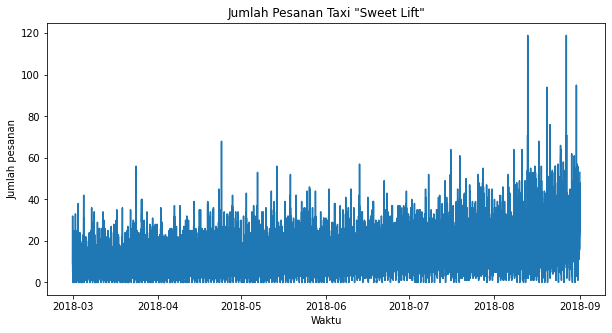

In [13]:
plt.figure(figsize=(10,5))
plt.title('Jumlah Pesanan Taxi "Sweet Lift"')
plt.ylabel('Jumlah pesanan')
plt.xlabel('Waktu')
plt.plot(taxi)

***
Based on the information above, it is known that the `datetime` data has been sorted correctly, where the minimum time is on the date of `2018-03-01 at 00.00.00`, and the maximum is the date of `2018-08-31`, so it can be seen that the time interval of historical data is during the months of `March - August` in 2018. Based on the time series graph above, it is also quite difficult to read because the fluctuation value is quite high. Therefore,  to facilitate analysis, a **resample** of the time series will be carried out along with smoothing the data using the **moving average** method.

**Resampling Dataset**

Next, we will resample the datetime in `1 hour` with the function **.resample()** with aggregation **.sum()**.

In [14]:
# resample datetime dalam 1 jam
tr = taxi.resample('1H').sum()
tr

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


## Analysis

At this stage, the time series data of taxi orders will be analyzed. The first step is to smooth the data using the **moving average** method with the help of the **.rolling()** function and the **.mean()** aggregate.

### Moving Average

Text(0.5, 1.0, 'Moving Average, window = 50')

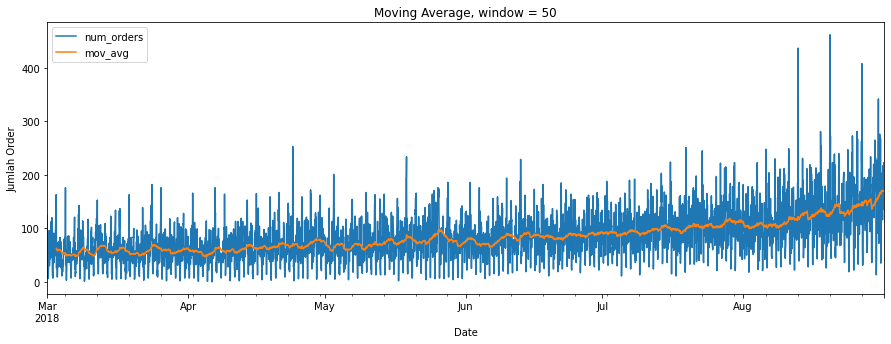

In [15]:
# menampilkan grafik moving average dengan ukuran jendela 50 
new_tr = tr.copy()
new_tr['mov_avg'] = new_tr.rolling(50).mean()

new_tr.plot.line(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Jumlah Order')
plt.title('Moving Average, window = 50')

***
Based on the `moving average` graph with the `orange` color above, the number of orders is quite fluctuating and tends to increase after the month of 'June'. To make it easier to analyze, we will resample again to `1 day` to make it more visible the increase in the number of orders each day.

**One Day Resample**

In [16]:
# resample datetime dalam 1 hari
trd = taxi.resample('1D').sum()
trd

,num_orders
datetime,
2018-03-01,1364
2018-03-02,1506
2018-03-03,1290
2018-03-04,1141
2018-03-05,1259
...,...
2018-08-27,3936
2018-08-28,3357
2018-08-29,3762


Text(0.5, 1.0, 'Moving Average, window = 10')

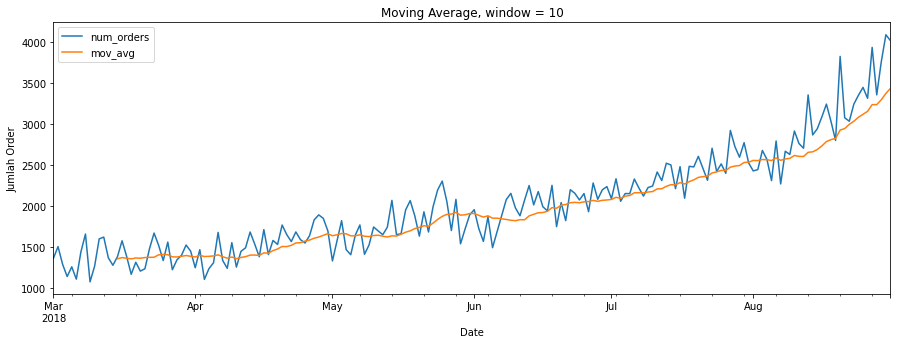

In [17]:
# menampilkan grafik moving average dengan ukuran jendela 15 resample 1 hari
new_trd = trd.copy()
new_trd['mov_avg'] = new_trd.rolling(15).mean()

new_trd.plot.line(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Jumlah Order')
plt.title('Moving Average, window = 10')

***
From the new `moving average` graph above, it can be observed that there is a fairly steady increase in the number of orders every day from the month of `May` onwards. For more details, the data trend and seasonality will be shown at a later stage.

### Trends and Seasonality

To see the trend and seasonality of the data, we will use the help of the **seasonal_decompose** function from the statsmodels.tsa.seasonal module.

In [18]:
# memuat fungsi seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# membuat instance
decomposed = seasonal_decompose(trd)

Text(0.5, 1.0, 'Trend Data')

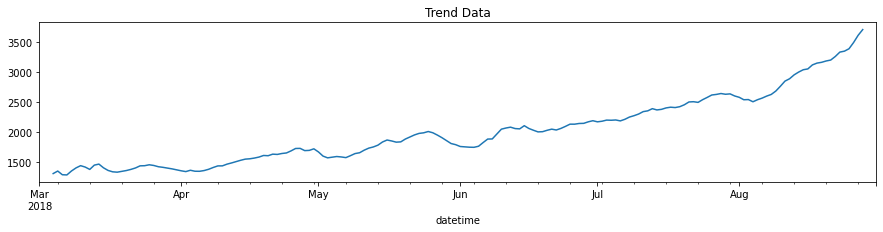

In [19]:
# menampilkan tren data
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), figsize=(15,10))
plt.title('Trend Data')

From the graph above, it is quite clear that the trend of the number of orders has increased every day.

Text(0.5, 1.0, 'Musiman Data')

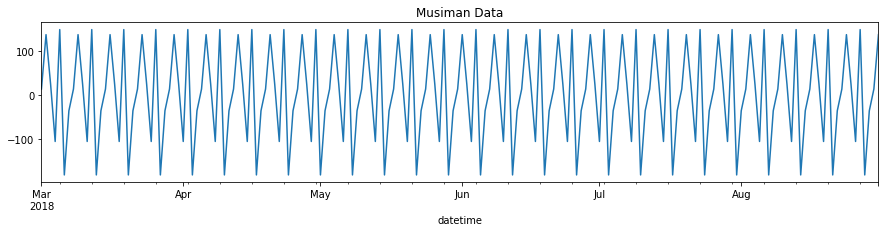

In [20]:
# menampilkan musiman data
plt.subplot(311)
decomposed.seasonal.plot(ax=plt.gca(), figsize=(15,10))
plt.title('Musiman Data')

Text(0.5, 1.0, 'Residual')

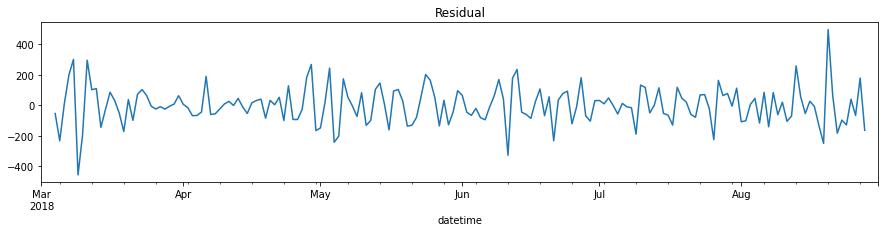

In [21]:
# menampilkan residual
plt.subplot(311)
decomposed.resid.plot(ax=plt.gca(), figsize=(15,10))
plt.title('Residual')

From the seasonal data graph, it can be seen that the data distribution experiences periodic fluctuations in value where the pattern formed tends to repeat in each month. For more details, the seasonality of the data will be shown in the time interval of the first 15 days of March.

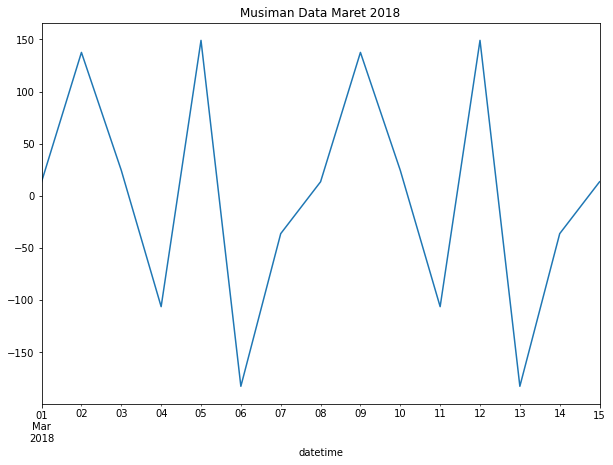

In [22]:
# menampilkan musiman data bulan maret 2018
decomposed.seasonal['2018-03-01' : '2018-03-15'].plot(figsize=(10,7))
plt.title('Musiman Data Maret 2018')
plt.show()

Based on the graph above, it can be seen that the peak number of taxi orders occurs on dates `2, 9`, which is a `Friday` in real time, and dates `5, 12`, which is a `Monday`, meaning that the increase in the number of taxi orders tends to occur at the beginning and end of the working day.

### Stationarity Check

To check whether the time series is stationary or not, we will use the Augmented Dickey-Fuller (ADF) test from the statsmodels.tsa.stattools module.

In [23]:
# import metode adfuller dari model library statsmodels
from statsmodels.tsa.stattools import adfuller

# menjalankan uji ADF
result = adfuller(trd)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:", critical_values)

# interpretasi hasil
if adf_statistic < critical_values['5%']:
    print("Deret waktu stasioner.")
else:
    print("Deret waktu tidak stasioner")

ADF Statistic: 3.728791311564992
p-value: 1.0
Critical Values: {'1%': -3.469413468959902, '5%': -2.8786964197028295, '10%': -2.5759166089965397}
Deret waktu tidak stasioner


Based on the ADF test above, it is known that the time series data is not stationary, which will have an impact on machine learning modeling, but in training, this dataset model will still be used without data transformation.

## Training

The first step in modeling is to prepare the features in the dataset. The prepared features are:
- Calendar feature
- Lag feature
- Moving Average

### Feature Preparation

In [24]:
# membuat fungsi fitur baru
def make_features(data, max_lag, rolling_mean_size):
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['mv_avg'] = (data['num_orders'].shift()).rolling(rolling_mean_size).mean()

# menerapkan fungsi
make_features(tr, 5, 7)
tr.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,mv_avg
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,NaN


In [25]:
# drop nilai NaN dari deret waktu
tr = tr.dropna()
print('Dataset Time Series memiliki', tr.shape[0], 'observasi dan', tr.shape[1], 'kolom')
print()
tr.head(10)

Dataset Time Series memiliki 4409 observasi dan 11 kolom



,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,mv_avg
datetime,,,,,,,,,,,
2018-03-01 07:00:00,15,3,1,3,7,12.0,6.0,43.0,66.0,71.0,58.142857
2018-03-01 08:00:00,34,3,1,3,8,15.0,12.0,6.0,43.0,66.0,42.571429
2018-03-01 09:00:00,69,3,1,3,9,34.0,15.0,12.0,6.0,43.0,35.285714
2018-03-01 10:00:00,64,3,1,3,10,69.0,34.0,15.0,12.0,6.0,35.000000
2018-03-01 11:00:00,96,3,1,3,11,64.0,69.0,34.0,15.0,12.0,34.714286
2018-03-01 12:00:00,30,3,1,3,12,96.0,64.0,69.0,34.0,15.0,42.285714
2018-03-01 13:00:00,32,3,1,3,13,30.0,96.0,64.0,69.0,34.0,45.714286
2018-03-01 14:00:00,48,3,1,3,14,32.0,30.0,96.0,64.0,69.0,48.571429
2018-03-01 15:00:00,66,3,1,3,15,48.0,32.0,30.0,96.0,64.0,53.285714


The dataset already has new features. Next, prepare the train set and test set.

### Train and Test Set Preparation

The test set to be prepared is `10%` of the initial data.

In [26]:
# import fungsi train_split_test 
from sklearn.model_selection import train_test_split

# menyiapkan train set dan test set
train, test = train_test_split(tr, shuffle=False, test_size=0.1)

In [27]:
# menampilkan hasil splitting data dan index dari masing-masing dataset
print('Train set : ', train.shape)
print('Test set : ', test.shape)
print()
print('Train index : ', train.index.min(), 'sampai', train.index.max())
print('Test index : ', test.index.min(), 'sampai', test.index.max())

Train set :  (3968, 11)
Test set :  (441, 11)

Train index :  2018-03-01 07:00:00 sampai 2018-08-13 14:00:00
Test index :  2018-08-13 15:00:00 sampai 2018-08-31 23:00:00


In [28]:
# menyiapkan variabel target dan feature
x_train = train.drop(['num_orders'], axis=1)
y_train = train['num_orders']
x_test = test.drop(['num_orders'], axis=1)
y_test = test['num_orders']

### Modeling

Machine learning models that will be developed are:
1. Linear Regression
2. Random Forest Regressor
3. Kneighbor Regressor
4. XGBoost Regressor
5. CatBoost Regressor

The evaluation metric to be used for model development is the **RMSE** metric. The metric evaluation function is first created.

In [29]:
# menyiapkan fungsi rmse
from sklearn.metrics import mean_squared_error

def rmse(y, a):
    return mean_squared_error(y,a)**0.5

Furthermore, GridSearchCV and time series splitting function to perform hyperparameter optimization.

In [30]:
# import fungsi pencarian grid untuk tunning hyperparameter
from sklearn.model_selection import GridSearchCV

In [31]:
# import time series 
from sklearn.model_selection import TimeSeriesSplit

# memisahkan time series 
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


#### Linear Regression (LR)

In [32]:
# mengimport model linear regression
from sklearn.linear_model import LinearRegression

In [33]:
%%time

# melakukan pelatihan model
lr = LinearRegression()
lr.fit(x_train, y_train)

# prediksi model
predict_train = lr.predict(x_train)

# menampilkan metriks evaluasi rmse
print('RMSE LR dataset train : ', round(rmse(y_train, predict_train), 2))

RMSE LR dataset train :  30.49
CPU times: user 9.86 ms, sys: 29.5 ms, total: 39.3 ms
Wall time: 13.5 ms


Based on the prediction results above, it is known that the rmse value is quite low, where the rmse of the train dataset is `30.49`.

#### Random Forest Regresor (RF)

In [34]:
# mengimport random forest regressor dari modul sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [64]:
%%time
# optimasi hyperparameter model Random Forest Regressor

# menentukan tuning hyperparameter
rf_grid = {
    "n_estimators"       : [25, 50, 100, 200],
    "max_depth"          : [2, 4, 8, 10],
    "min_samples_leaf"   : [2, 4, 6, 8]
}

# instance 
model = RandomForestRegressor(random_state = 42)
grid_search_rf = GridSearchCV(estimator = model, param_grid = rf_grid, scoring= 'neg_mean_squared_error', cv=tscv)

# menjalankan grid search
grid_search_rf.fit(x_train, y_train)

# menampilkan best parameter 
print('Parameter terbaik : {}'. format(grid_search_rf.best_params_))

Parameter terbaik : {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}
CPU times: user 3min 3s, sys: 277 ms, total: 3min 3s
Wall time: 3min 6s


Based on the results of the parameter tuning above, the best parameters are obtained:
1. Max_depth: 10
2. Min_samples_leaf : 4
3. N_estimators : 200

In [65]:
%%time
# pelatihan model random forest dengan hyperparameter baru
rf = RandomForestRegressor(max_depth = 10, min_samples_leaf = 4, n_estimators = 200, random_state=42)
rf.fit(x_train, y_train)

# prediksi model
predict_train = rf.predict(x_train)

# menampilkan metriks evaluasi rmse
print('RMSE RF dataset train : ', round(rmse(y_train, predict_train), 2))

RMSE RF dataset train :  16.91
CPU times: user 3.46 s, sys: 7.93 ms, total: 3.47 s
Wall time: 3.47 s


Based on the prediction results above, it is known that the rmse value is lower than the Linear Regression model, where the rmse of the train dataset is `16.91`.

#### KNeighbor Regressor (KNN)

In [37]:
# mengimport knn regressor dari modul sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

In [38]:
%%time
# optimasi hyperparameter model KNeighbors Regressor

# menentukan tuning hyperparameter
knn_grid = {'n_neighbors' : range(1,5,1),
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
           }

# instance 
knn = KNeighborsRegressor()

# Grid search 
grid_search_knn = GridSearchCV(
    estimator   = knn,
    param_grid  = knn_grid,
    scoring     = "neg_mean_squared_error",
    cv          = tscv, 
    n_jobs      = 1
)

# menjalankan grid search
grid_search_knn.fit(x_train, y_train)

# hasil 
print('Parameter terbaik: {}'.format(grid_search_knn.best_params_))

Parameter terbaik: {'algorithm': 'auto', 'n_neighbors': 4}
CPU times: user 2.29 s, sys: 1.43 s, total: 3.72 s
Wall time: 3.67 s


Based on the hyperparameter tuning results above, the best parameters are obtained:
1. algorithm: auto
2. n_neighbors : 4 

In [39]:
%%time
# pelatihan model knn dengan hyperparameter baru
knn = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 4)
knn.fit(x_train, y_train)

# prediksi model
predict_train = knn.predict(x_train)

# menampilkan metriks evaluasi rmse
print('RMSE KNN dataset train : ', round(rmse(y_train, predict_train), 2))

RMSE KNN dataset train :  24.59
CPU times: user 106 ms, sys: 44 µs, total: 106 ms
Wall time: 104 ms


Based on the prediction results above, it is known that the rmse value is quite low at `24.59`.

#### XGBoost Regressor (XGB)

In [59]:
# mengimport model xgboost dan fungsi randomizedsearchcv
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# optimasi hyperparameter
params = {
    "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25],
    "max_depth" : [3, 4, 5, 6, 8, 10],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7],
    "n_estimators" : [200]
}

In [60]:
%%time

# membuat instance
xgb = XGBRegressor(random_state=42)

# tunning hyperparameter
random_search = RandomizedSearchCV(xgb,param_distributions=params,
                                   n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# melakukan optimasi
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200; total time=   2.3s
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200; total time=   2.4s
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200; total time=   2.5s
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200; total time=   2.6s
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=200; total time=   2.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200; total time=   2.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200; total time=   

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [61]:
# menampilkan tunning hyperparameter terbaik
random_search.best_params_

{'n_estimators': 200,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

The hyperparameter optimization results have been obtained. These tunning results will then be used for `XGBoost` gradient boosting training.

In [66]:
%%time

# melatih model xgboost
xgb = XGBRegressor(colsample_bytree=0.7, gamma=0.4, learning_rate=0.1, max_depth=4,
              min_child_weight=5, n_estimators=200)
xgb.fit(x_train, y_train)

# prediksi model
predict_train = xgb.predict(x_train)

# menampilkan metriks evaluasi rmse
print('RMSE XGB dataset train : ', round(rmse(y_train, predict_train), 2))

RMSE XGB dataset train :  16.32
CPU times: user 2.83 s, sys: 44.8 ms, total: 2.87 s
Wall time: 2.86 s


Based on the prediction results above, it is known that the rmse value of the XGBoost model is very low at `16.32`.

#### CatBoost Regressor (CB)

In [45]:
# menginstall library catboost
!pip install catboost

In [46]:
# import gradient boosting catboost regressor
from catboost import CatBoostRegressor

In [51]:
%%time
# optimasi hyperparameter model catboost regressor

# menentukan tuning hyper parameter
cb_grid= {'learning_rate'  : [0.001, 0.01, 0.5],
       'depth'          : [4, 6, 10],
       'l2_leaf_reg'    : [1, 3, 5, 7]
      }

# instance
cb = CatBoostRegressor(
    iterations            = 200,
    logging_level          = 'Silent',
    loss_function          = 'RMSE',
    early_stopping_rounds  = 50,
    random_state           = 12345)

# Grid Search 
grid_search = GridSearchCV(estimator = cb, param_grid = cb_grid, scoring='neg_mean_squared_error', cv=tscv)
# menjalankan grid search
grid_search.fit(x_train, y_train)
# hasil
print('Parameter terbaik: {}'. format(grid_search.best_params_))

Parameter terbaik: {'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.5}
CPU times: user 4min 21s, sys: 782 ms, total: 4min 22s
Wall time: 4min 38s


Based on the hyperparameter tunning results above, the best parameters are obtained:
1. depth: 4
2. l2_leaf_reg : 5
3. learning_rate: 0.5

In [52]:
%%time

# melatih model catboost
cb = CatBoostRegressor(depth=4, l2_leaf_reg=5, learning_rate=0.5, random_state=12345)
cb.fit(x_train, y_train)

# prediksi model
predict_train = cb.predict(x_train)

# menampilkan metriks evaluasi rmse
print('RMSE CB dataset train : ', round(rmse(y_train, predict_train), 2))

0:	learn: 32.8628608	total: 1.67ms	remaining: 1.67s
1:	learn: 28.2935131	total: 3.44ms	remaining: 1.72s
2:	learn: 26.6219125	total: 5.07ms	remaining: 1.68s
3:	learn: 25.7799747	total: 6.6ms	remaining: 1.64s
4:	learn: 24.8358350	total: 8.16ms	remaining: 1.62s
5:	learn: 24.7652343	total: 9.66ms	remaining: 1.6s
6:	learn: 24.6993414	total: 11ms	remaining: 1.56s
7:	learn: 24.3609153	total: 12.6ms	remaining: 1.56s
8:	learn: 24.3147918	total: 14.2ms	remaining: 1.56s
9:	learn: 23.9750938	total: 15.8ms	remaining: 1.57s
10:	learn: 23.9362059	total: 17.3ms	remaining: 1.56s
11:	learn: 23.8832624	total: 18.8ms	remaining: 1.55s
12:	learn: 23.8509007	total: 20.3ms	remaining: 1.54s
13:	learn: 23.8319564	total: 21.8ms	remaining: 1.54s
14:	learn: 23.1711700	total: 23.3ms	remaining: 1.53s
15:	learn: 22.9019573	total: 24.7ms	remaining: 1.52s
16:	learn: 22.7630156	total: 26.2ms	remaining: 1.51s
17:	learn: 22.6957922	total: 27.6ms	remaining: 1.5s
18:	learn: 22.3726382	total: 29ms	remaining: 1.5s
19:	learn: 

Based on the prediction results above, it is known that the rmse value of the CatBoost model is quite low at `6.81`.

**TRAINING RESULT**

At this stage, the results of model training will be analyzed against the running time `tunning hyperparameter`, `training-prediction`, and `RMSE` scores of each model.

In [1]:
hasil_pelatihan = {"Model" : ["Linear Regression", "Random Forest Regressor", "KNeighbors Regressor", "XGBoost Regressor", "CatBoost Regressor"], "Hyperparamater Tune Time" : ['0', '3 min 6 s', '3.67 s', '1 min 12 s','4 min 38 s'] , "Training-Prediction Time" :  ['13.5 ms','3.47 s','104 ms','2.86 s','1.81 s'], "RMSE" :  ['30.49', '16.91','24.59','16.32','6.81']}

In [4]:
pd.DataFrame(hasil_pelatihan)

,Model,Hyperparamater Tune Time,Training-Prediction Time,RMSE
0,Linear Regression,0,13.5 ms,30.49
1,Random Forest Regressor,3 min 6 s,3.47 s,16.91
2,KNeighbors Regressor,3.67 s,104 ms,24.59
3,XGBoost Regressor,1 min 12 s,2.86 s,16.32
4,CatBoost Regressor,4 min 38 s,1.81 s,6.81


Based on the training results above, based on the hyperparameter tuning running time, the `KNeighbors` model has the fastest time compared to other models at `3.67s`, while the `Linear Regression` model has no tuning. The training and prediction running time of the `Linear Regression` model is the fastest at `13.5 ms`, but the RMSE score is very large, reaching `30.49`. The lowest RMSE score is obtained from the CatBoost Regressor model, where the RMSE obtained is much lower than the project's target RMSE score of `6.81`, but the hyperparameter tuning running time is very large, up to `4 min 38s`. Therefore, the model to be selected for the test dataset based on the RMSE score and short running time is the **XGBoost** model with an RMSE score of **16.32**, hyperparameter tuning running time of **1 min 12 s** and training-prediction time of **2.86s**.

## Testing

In this stage, we will predict the target test dataset with the `XGBoost Regressor` model with the best parameters.

In [70]:
%%time

# prediksi model dengan XGBoost Regressor
predict_test = xgb.predict(x_test)

# menampilkan metriks evaluasi rmse
print('RMSE XGB dataset test : ', round(rmse(y_test, predict_test), 2))

RMSE XGB dataset test :  43.12
CPU times: user 13.6 ms, sys: 66 µs, total: 13.7 ms
Wall time: 6.98 ms


Based on the above results, the RMSE score obtained from the test dataset is `43.12` so it can be concluded that the XGBoost Regressor model is quite capable of accurately predicting the number of taxi orders.

## Conclusion

- In this project, the dataset received is historical data of taxi orders at the airport every `10 minutes` in March–September 2018, consisting of 2 columns and 26496 observations. Based on the initial observation, there are no missing or duplicate values in the dataset. Data pre-processing was performed to change the data type in the `datetime` column from `object` to `datetime` data type and resampling the datetime into `1 hour` intervals with `.sum()` aggregation.
Based on the analysis of `moving average` and `trend data`, it is known that there has been a fairly steady increase in the number of orders since the month of `May 2018`, meaning that the number of taxi orders each month has an increasing trend, where the highest peak of taxi orders tends to occur at the beginning and end of weekdays.
- The model trained is:
1.    Linear Regression
2.    Random Forest Regressor
3.    KNeighbors Regressor
4.    XGBoost Regressor
5.    CatBoost Regressor
- After performing hyperparameter tuning, training, and model prediction with the train dataset, the results show that the `CatBoost Regressor` model provides the lowest RMSE score of `6.81`, but requires a large enough running time of `4 min 38 s` to perform hyperparameter tuning, so the model chosen for testing on the test dataset is the **XGBoost Regressor** model, which has an RMSE score of **16.32** with hyperparameter tuning running time of **1 min 12 s** and training-prediction running time **2.86 s**. Based on the results of testing the test dataset with the XGBoost Regressor model, the RMSE score is**43.12** with a running time of **6.98 ms** so it can be concluded that the XGBoost Regressor model is quite capable of accurately predicting the number of taxi orders.